![Xkcd python comment](https://imgs.xkcd.com/comics/python.png)

There are many compiled programming languages out
there: <b><i>C++, C, Fortran, ...</i></b>.<br/>  These
are the heavyweight languages which are great for
learning how to program "properly" (i.e. type safe) and
are <em>fast</em>. But they are designed more for the
computer, not so much for you.

The interpreted languages: <b><i>python</i></b>, ruby,
erlang, perl, gawk, bash, Java(ish)/javascript, go,
rust, MATLAB... are lightweight, designed to be as
simple as possible for you; however, the are <em>slow</em>, but if you add in time spent programming, they are usually faster.

<b>Python</b> is general, powerful, popular and has a HUGE collection of libraries (see above). This is a quick introduction to python.

# Part 01 - Fast introduction to python

Learning to code is like learning to speak another language or play an instrument. There is no substitute for practice!

In this set of notes, coding via python is demonstrated via example. You can (and must) edit and re-run the examples. In fact, this is more of a tour of python, pointing out its interesting bits, if you don't get off the bus and get stuck in it will just pass you by.

This web page is a Jupyter notebook, which is a way of running python via the web which means we can skip all the usual set up troubles of installing and setting up python and get stuck in, but please try to install python 3 (e.g. anaconda) on your own personal laptop/computer so you can work on python on your own in the future.

These notes assume you are vaguely aware of the basics of programming, but not really comfortable with them. Lots of detail is skipped over so we can get to examples in the next chapters quickly. You will have to "google" and ask questions when something is covered too quickly or incompletely.

** Ultimately, you must learn to teach yourself programming! **

## Part 01A - Basic investigation of code (`print()`, `help()`, `type()`) 

Computers follow programs line by line executing all commands in the order it finds them. They are incredibly dumb and get confused easily if instructions are vague. You will need to check what the computer is doing and so you need to get it to talk to you.

For example, in python we can get the computer to write stuff on the screen using the print command.

In [71]:
print("Hello world")

Hello world


Hello world needs to be within either double (`"`) or single (`'`) quotes (they're the same in python), as the computer needs to know that this a string of characters (aka str) and not the name of a variable or function (like `print`). For example, we can ask print to write itself on the screen,

In [72]:
print(print)

<built-in function print>


and what we get instead is a description of what print is. Lots of things have printable representations like this which are quite useful if we're wanting to check what a variable or function is later on. 

There are a couple of other really useful functions for figuring out what is going on. For example, `help()` prints to screen how to use an object (i.e. a function)

In [73]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



You can also ask what type or class something is using the type() function,

In [74]:
type(print)

builtin_function_or_method

We should note that `type()` doesn't print its result but instead returns a type object; however, jupyter automatically prints the result of the last line of any code block, so we don't need a `print()` on the last line. E.g.,

In [75]:
"Not printed"
1+1

## Part 01B - Variables, lists, comments, and mutability

We often want to store things (objects) in memory. To track where we've put them we use variables. Variables in python are "pointers" to objects in memory, they are not the objects themselves but you can usually treat them like they are.

What's confusing about variables in python is that their behaviour changes if the object(s) they are pointing to are `mutable` or `immutable`. For example, numbers and strings are immutable. This means that whenever something is done to them, a new object must be created. Any variables still pointing to the old object will remain unchanged.

To better understand this, take a look at the following code,

In [76]:
#Everything after a # on a line is ignored, so we use it for comments
a = 1     #a points to 1
b = a     #b also points to 1
a += 1    #Add one to a, this must make a new number (2) as integers are immutable
print(a)  # a is now pointing to 2
print(b)  # b is still pointing to 1

2
1


Most programmers would assume that `b=a` copies the value of `a` into `b` but in fact `a` and `b` now point to the same object. Immutable objects generally don't cause suprises for the programmer who thinks a copy takes place, as if a change happens a new object is created; However, mutable objects are very common as python avoids copying whenever possible (as its expensive) and they often lead to surprises!

For example, python has `list`s for storing objects together in a particular order. `List`s are mutable, so this means that changes to a `list` will be reflected in all variables which point to that list.

In [3]:
a = [1,2,3]   # a points to a new list with three elements
b = a         # b points to the same list (no copying)
a.append(4)   # we add 4 to the back of the list, but its the same list as b
print(a)      
print(b)      # both a and b now contain 4!

[1, 2, 3, 4]
[1, 2, 3, 4]


What makes this confusing is that some operations will make a new list, and some will not!

In [5]:
a = [1,2,3]
b = a
a += [4,5,6] # addition merges lists so [4,5,6] will be added to both a and b
a = a + [7] # only a will get 7 added, and now its a different list to b!
print(a)
print(b)

[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6]


I promise you, mutability is the worst part of python to understand. The rest is quite logical and even mutability is logical once you get used to when copies do/don't take place. A key rule is that python avoids copying whenever its expensive, and that's most of the time.

## Part 01C - lists, slicing, and error messages

Lists are very useful, we can store items, retrieve them, add them on etc.

In [8]:
alist = [5,4,1,9]      # Create a list 
alist.append(6)        # Add an item to the back of the list
print(alist)           # [5, 4, 1, 9, 6]
alist.sort()           # Sort the list in-place
print(alist)           # [1, 4, 5, 6, 9]
print(alist.pop())     # returns and removes the last element (writes 9 to the screen)
print(alist)           # [1, 4, 5, 6]
print(alist[0])        # prints 1, the first element
print(alist[-1])       # prints the last element (6)
print(alist[-2])       # prints the second to last element 5
alist[2] = "Hello"     # We can change items anywhere in the list, but mixed types may break sorting
print(alist)           # [1, 4, 'Hello', 6]
print(len(alist))      # The length of the list, 4

[5, 4, 1, 9, 6]
[1, 4, 5, 6, 9]
9
[1, 4, 5, 6]
1
6
5
[1, 4, 'Hello', 6]
4


What makes lists really powerful is the ability to slice them! You use colons to specify the `start:end:step` of the slice. If any are left blank, the defaults of `0:len():1` are used

In [9]:
a = [0,1,2,3,4,5,6,7,8,9]
print(a[0:len(a):1])    # [0,1,2,3,4,5,6,7,8,9] the default output of everything
print(a[0::2])          # [0, 2, 4, 6, 8] only the odd ones
print(a[-1::-1])        # [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]  reverse the list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 8]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


Slicing actually forms a new list (kinda, it doesn't cause a copy of the objects themselves), so you don't have to worry about mutability here. 

Strings are also "list-like" (i.e., they are both `sequence`s) except they are immutable, so you cannot assign to them 

In [81]:
print("Hello"[0])   # prints 'H'
print("Hello"[::2]) # prints Hlo
#Uncomment the next line to see the error!
#"Hello"[0] = "Y"    #This fails

H
Hlo


Great! Our first error message (if you uncommented and re-ran the cell). See how it tells you the line number (3) where the error is, and tells you the 'str' (string) object does not support assignment! Very useful. You will become an expert at understanding errors as you learn to program.

## Part 01D - for loops

Unlike other programming languages, python for loops ALWAYS loop over the contents of a container (e.g. a list) or a generator (a dynamically generated list). For example,

In [82]:
for i in [1,2,3]:# A colon (:) at the end of a line  is always used to indicate a start of a separate block of code
    print(i)     # Python uses whitespace (the indent) to denote a block of code
    print("--")  # This line is also part of the for loop as its also indented!

1
--
2
--
3
--


The most common use of a `for` loop in other languages is to count with an index. Making a container of sequential indices is quite tedious by hand so there are some built-in functions which do the job, e.g. the `range()` function.

In [83]:
for i in range(3):
    print(i)

0
1
2


If you investigate `range()` by printing it, you'll find its not a list, but it can be converted to one and even sliced like one (it is also a sequence).

In [14]:
print(range(9))
print(list(range(3)))

range(0, 9)
[0, 1, 2]


This is because `range()` is a generator. Rather than make a list of numbers (and incur the cost in memory and time required to make the list) generators calculate the values as they are required.

# Part 01E - `if` statements

To have our code make decisions we need `if` statements. We need a logic statement to test, and then an action to carry out if the statement is true, e.g.,

In [85]:
if 1 + 1 == 2:
    print("Mathematics works")

Mathematics works


There are lots of comparison operations and ways of performing logical combinations. 

| Symbol | Task Performed |
|----|---|
| == | True, if it is equal |
| !=  | True, if not equal to |
| < | less than |
| > | greater than |
| <=  | less than or equal to |
| >=  | greater than or equal to |
| `and` | true if both operands are true |
| `or`  | true if either operand is true |
| `is` | are the two objects the same |
| `is not` | are the two objects different |


Note the difference between `==` (equality test) and `=` (assignment). Also note that `==` is not the same as `is`, which tests if it is the same piece of memory, e.g.,

In [86]:
print(1 == 1) # True
print(1 is 1) # True
print(1.0 is 1.0) # True
print((1.0+0.0) is 1.0) # False

True
True
True
False


We can also add on extra cases to our if statement,

In [87]:
the_answer = 42
if 0 < the_answer < 42:              # We can test ranges of values quite easily
    print("Low answer universe")
elif the_answer == 42:               # We can have as many elif statements as we like
    print("Douglas adams detected")
else:                                # but only one else statement per if
    print("No sense of humor found")

Douglas adams detected


Now is also a good time to summarise all the available mathematical operators

| Symbol | Task Performed |
|----|---|
| +  | Addition |
| -  | Subtraction |
| /  | division |
| %  | mod |
| *  | multiplication |
| //  | floor division |
| **  | to the power of |

## Part 01F - Functions

Functions should be used to create small self-contained blocks of code with a defined purpose and sensible name. Functions can take many arguments (inputs) and return many values. For example,

In [17]:
def my_divide(a, b):   # define a function which takes two arguments
    return a / b         # return the division of them

print(my_divide(1, 2))

0.5


This function takes two arguments and returns one value. Just like the for loop, indentation is used to distinguish the body of the function from the main code.

When we use this function, we can also say exactly the order in which we'd like to set arguments. E.g.,

In [20]:
print(my_divide(b=1,a=2))

2.0


These "named" arguments are known as keyword arguments.

Let's start to look at more interesting functions that return multiple values. This is a function that returns the minimum and maximum of a container (e.g. a list),

In [89]:
def min_max(sequence):
    min_val = None       # None is a special value used to indicate 
    max_val = None       # a variable is empty.
    if len(sequence) > 0:     # If we have some data in the sequence
        min_val = sequence[0] # start by assuming the first data point
        max_val = sequence[0] # is the min and max value.

    # Now check all other data points if they are higher/lower
    for data in sequence[1:]: # The slice skips the first element in the sequence. 
        min_val = min(data, min_val) 
        max_val = max(data, max_val)
    
    return min_val, max_val   # At the end of the loop return both values

#Example usage
print(min_max([])) # An empty container will return (None, None)
print(min_max([1, 5, 9, 0, 2])) # Should return (0, 9)

low, high = min_max([1, 5, 9, 0, 2]) # This is how you "unpack" multiple
                                     # return types to use them more

(None, None)
(0, 9)


Quite a lot in that one, but it should mostly be self explanatory. One of the big challenges in programming is how to think in loops like this, but the best way to learn this is to see lots of examples.

We should note that python of course already has built-in functions for the max and min elements of a sequence,

In [90]:
seq = [1, 5, 9, 0, 2]
maxval = max(seq)
minval = min(seq)
print(minval, maxval)

0 9


## Part 01G - Tuples and unpacking

Tuples are created most of the time when a comma is used in python (one exception is the comma in function calls), e.g., `return min_val, max_val` actually creates a tuple `min_val, max_val` and returns it. For example,

In [91]:
1,2,3

The parenthesis `()` are used to indicate a tuple exactly like square brackets indicate a list. Tuples behave exactly like lists EXCEPT they're immutable, so their length is fixed. They're mainly used for returning values. The key advantage is we can unpack other sequences into them, e.g.

In [92]:
a,b = [1,2]
print(a,b)

1 2


Try unpacking too many/few values to get a new kind of error message.

## Part 01H - Dictionaries

Dictionaries are the most important container in Python, because almost every type/object is a dictionary (well actually each object has a \__dict\__ attribute behind the scenes). They are mutable containers which store values using a key. The key can be almost anything, a number, a string, a list, etc. They are created using braces `{}`, e.g.

In [15]:
my_dict = { #Create a dictionary with three entries/keys/values
    "key": "value",
    1: 5,
    "a_list": [1,2,3,4],
}

print(my_dict["key"])
print(my_dict[1])
#Uncomment this line to see the error!
#print(my_dict['not_a_valid_key'])

#We can also assign to dictionaries
my_dict[(32,2)] = "Even tuples are allowed as keys"
print(my_dict)

value
5
{'key': 'value', 1: 5, 'a_list': [1, 2, 3, 4], (32, 2): 'Even tuples are allowed as keys'}


Looping over dictionaries can be done in two ways,

In [94]:
for key in my_dict:
    print(key, "->", my_dict[key])

print("\n### Slightly neater way")  # \n is a newline character
for key, value in my_dict.items(): #Using unpacking we can get both the key and value at the same time!
    print(key, "->", my_dict[key])    

key -> value
1 -> 5
a_list -> [1, 2, 3, 4]
(32, 2) -> Even tuples are allowed as keys

### Slightly neater way
key -> value
1 -> 5
a_list -> [1, 2, 3, 4]
(32, 2) -> Even tuples are allowed as keys


We will see later how dictionaries can be used to perform powerful sorting operations.

## Part 01I - importing other people's work

Finally, we're nearly ready to work on examples. The last item is using python libraries. This is python's strongest point, it has libraries for nearly everthing (not quite antigravity yet though). For example, if we want to do some math using standard functions,

In [95]:
import math

math.sin(3.3)

Or if you want python to do your math homework

In [96]:
import sympy as sp              #We can rename imported libraries
from sympy import init_printing # Or just pull individual bits out.
init_printing()                 # This gives us nice output for jupyter

x = sp.symbols('x')   
sp.diff(sp.cos(x*x)+sp.exp(x), x) #Take the derivative of cos(x^2)+e^x

Or even make nice plots

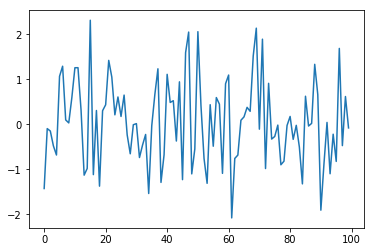

In [97]:
import numpy.random
y_data = []
for i in range(100):
    y_data.append(numpy.random.normal(0.0, 1.0))
import pylab
pylab.plot(y_data)
pylab.show()

Now we're ready to work on some problems!